In [51]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
from math import comb
import math
import os
import json
from pathlib import Path
import pickle
from utils import StringArt, create_img_from_anchors, detect_edges_color, outline_facial_features, resize_img
import importlib
import cv2
import dlib

In [52]:
def display_images(image_list):
    if not isinstance(image_list, list):
        image_list = [image_list]  # Make sure image_list is a list for consistent processing

    num_images = len(image_list)
    
    # Adjust for single image case
    if num_images == 1:
        fig, axes = plt.subplots(figsize=(10, 10))
        axes = [axes]  # Make axes a list for consistent processing
    else:
        fig, axes = plt.subplots(1, num_images, figsize=(num_images * 10, 10))
    
    for ax, img in zip(axes, image_list):
        ax.imshow(img.T, cmap="gray_r")
        ax.axis('off')  # Turn off axis numbers and ticks
    
    plt.tight_layout()
    plt.show()

In [53]:
NUM_ANCHORS = 288 #Number of anchors around the circle
LINE_DARKNESS = 0.2  #Brightness of the center of each line
IMG_PATH = "../data/tom.jpg"
NUM_LINES = 8000
IMG_SIZE = 1400
IMPORTANCE = 2


In [54]:
art = StringArt(image_path=IMG_PATH, num_anchors=NUM_ANCHORS, line_darkness=LINE_DARKNESS, num_lines=NUM_LINES)
art.img_size=IMG_SIZE
art.importance_map_multiplier = IMPORTANCE

In [55]:
art.load_img()
art.crop_img()
edges_layer = detect_edges_color(art.img, low_threshold=30, high_threshold=85, gaussian_blur_size=15, dilate_iterations=4)
edges_layer = resize_img(edges_layer, art.img_size)

In [56]:
"""overlay = np.array(Image.open("../data/tom_importance_map.jpg"))
overlay = overlay.transpose(1, 0, 2)
height, width, _ = overlay.shape
center = (int(height / 2), int(width / 2))
radius = min(center[0], center[1])
# Crop the image
overlay = overlay[center[0]-radius:center[0]+radius, center[1]-radius:center[1]+radius, :]

overlay = cv2.cvtColor(overlay, cv2.COLOR_RGB2GRAY)
overlay = np.array(overlay) / 255.0
overlay = resize_img(overlay, art.img_size)
display_images(overlay)
print(overlay.shape)"""

'overlay = np.array(Image.open("../data/tom_importance_map.jpg"))\noverlay = overlay.transpose(1, 0, 2)\nheight, width, _ = overlay.shape\ncenter = (int(height / 2), int(width / 2))\nradius = min(center[0], center[1])\n# Crop the image\noverlay = overlay[center[0]-radius:center[0]+radius, center[1]-radius:center[1]+radius, :]\n\noverlay = cv2.cvtColor(overlay, cv2.COLOR_RGB2GRAY)\noverlay = np.array(overlay) / 255.0\noverlay = resize_img(overlay, art.img_size)\ndisplay_images(overlay)\nprint(overlay.shape)'

In [57]:
art.make_greyscale()
art.resize_img()
art.apply_mask()
art.importance_map = np.zeros(art.img.shape)
art.add_to_importance_map(edges_layer)
#art.add_to_importance_map(overlay)
art.finalize_importance_map()

In [58]:
def dynamic_sigmoid(image, C=1):
    sigma = np.std(image)
    transformed = C / (1 + np.exp(-image/sigma))
    return transformed

In [59]:
def black_importance_map(image, C=1):
    new_map = np.sign(C) * (C**2) * image
    return new_map

In [60]:
def white_importance_map(image, C=1):
    new_map = np.sign(C) * (C**2) * (1-image)
    return new_map

In [61]:
def display_importance(importance_map):
    plt.figure(figsize=(10,10))
    plt.imshow(importance_map.T, cmap='RdBu_r')
    plt.colorbar()
    plt.show()

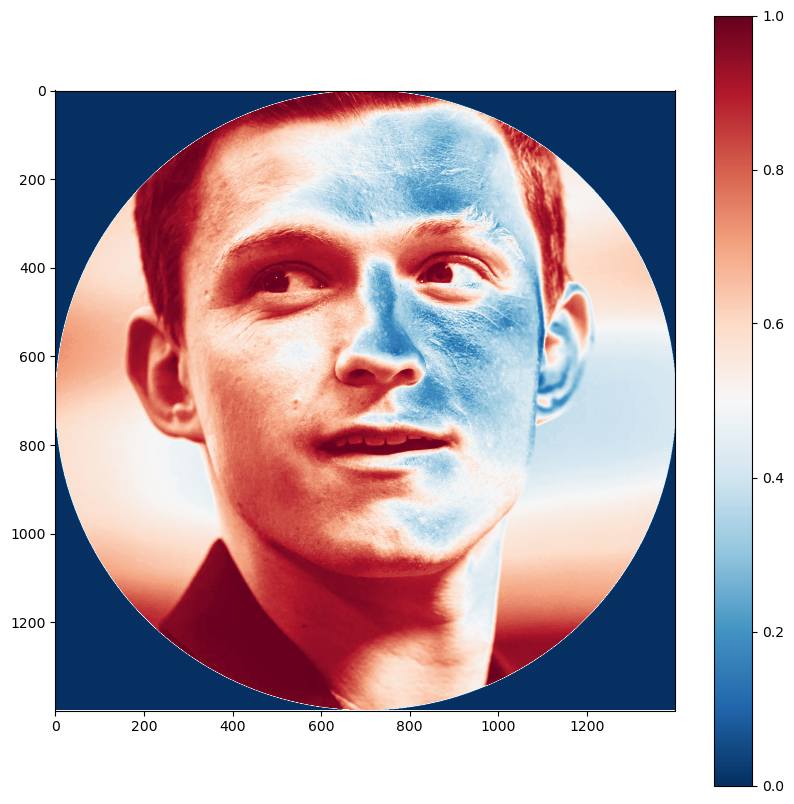

In [62]:
black_importance = 1
black_map = black_importance_map(art.img, C=black_importance)
display_importance(black_map)

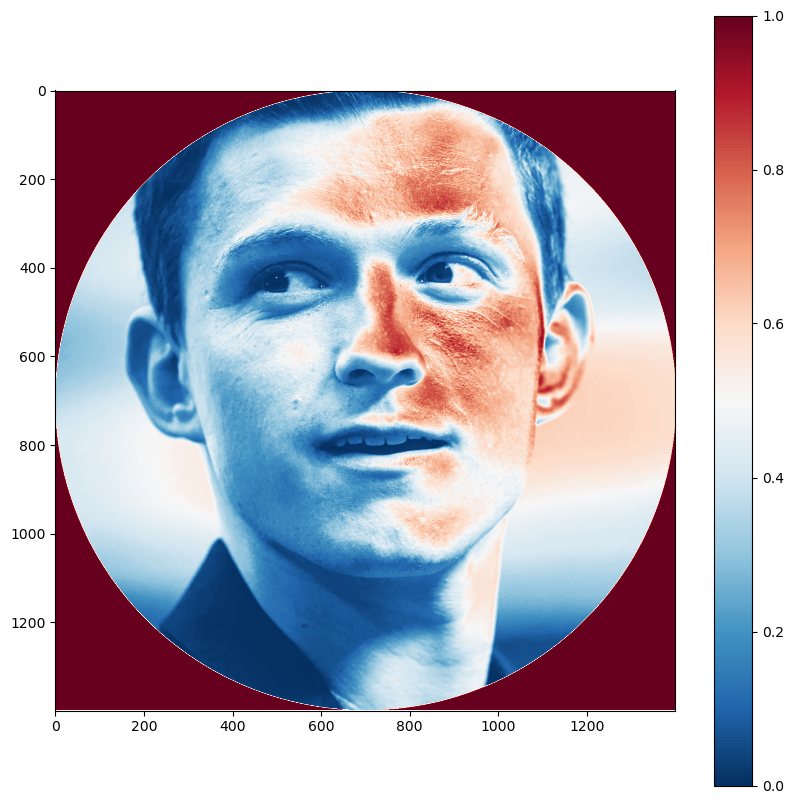

In [63]:
white_importance = 1
white_map = white_importance_map(art.img, C=white_importance)
display_importance(white_map)

In [19]:

art.create_anchors()
art.create_circle_mask()

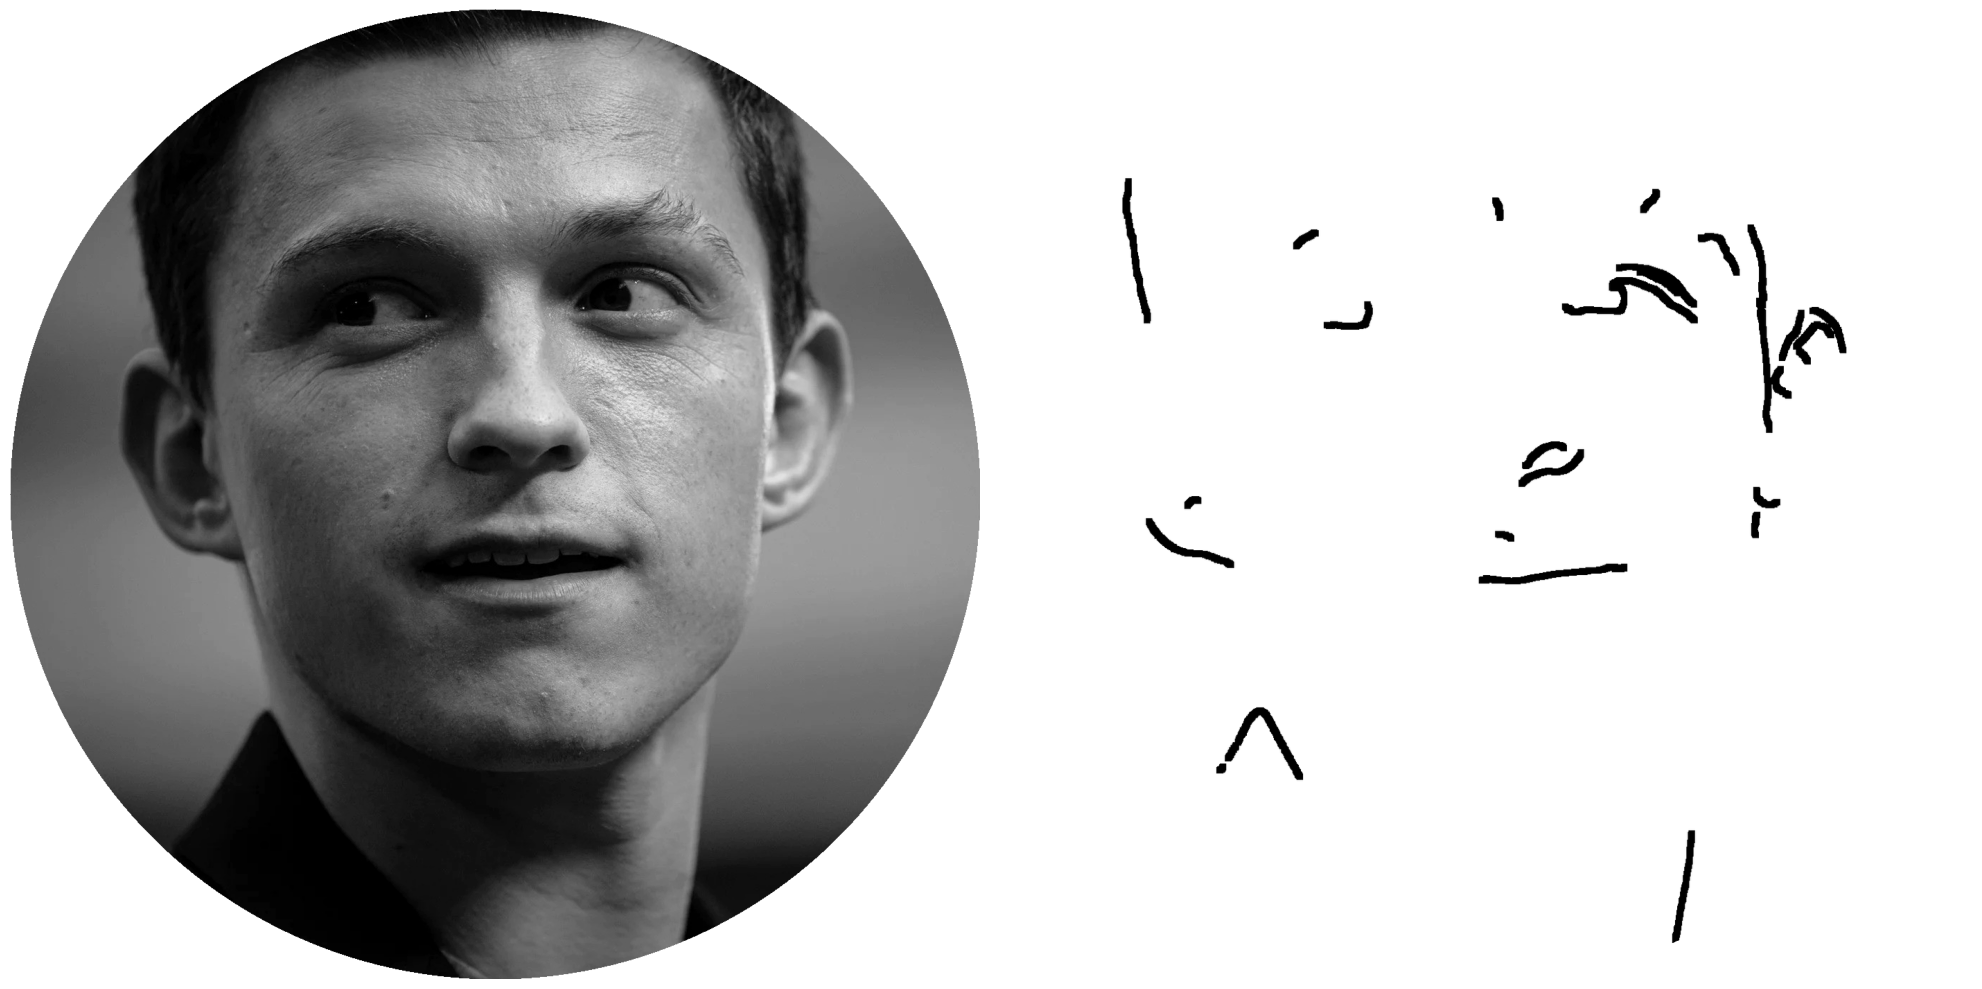

In [20]:
display_images([art.img, art.importance_map])

In [82]:
art.benchmark_line_dict()

Starting benchmark for line dict
Done! Generated 288 anchor lines on a canvas of size of 1400 in 408.5 milliseconds. Estimated time for generating line dict is about 58.6 seconds


In [83]:
art.make_line_dict()

In [84]:
art.create_string_art_img()
art.create_difference_img()

In [85]:
art.benchmark_string_art()

Starting benchmark for string art
Done! Found the best line out of 287 anchors lines on a canvas of size of 1400x1400 in 36.6 milliseconds. Estimated time for finding all lines is 292.5 seconds


In [86]:
art.create_string_art()

Drawing Line: 100%|██████████| 8000/8000 [04:00<00:00, 33.29it/s]


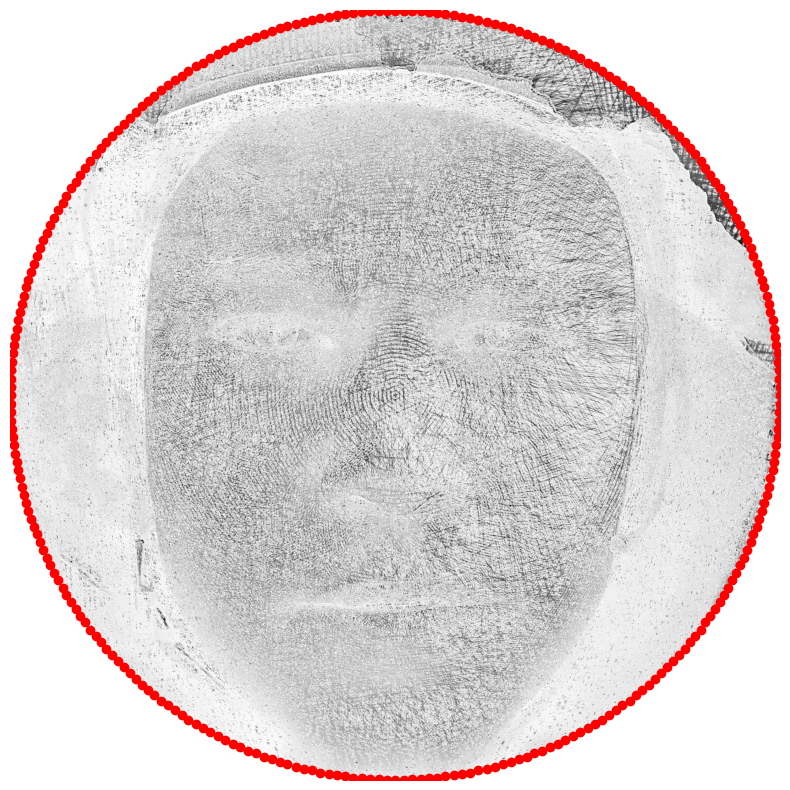

In [87]:
plt.figure(figsize=(10, 10))  
plt.imshow(art.difference_img.T, cmap='gray_r')
anchors_x, anchors_y = zip(*art.anchors)
plt.scatter(anchors_x, anchors_y, color='red')
plt.axis('off')
plt.show()

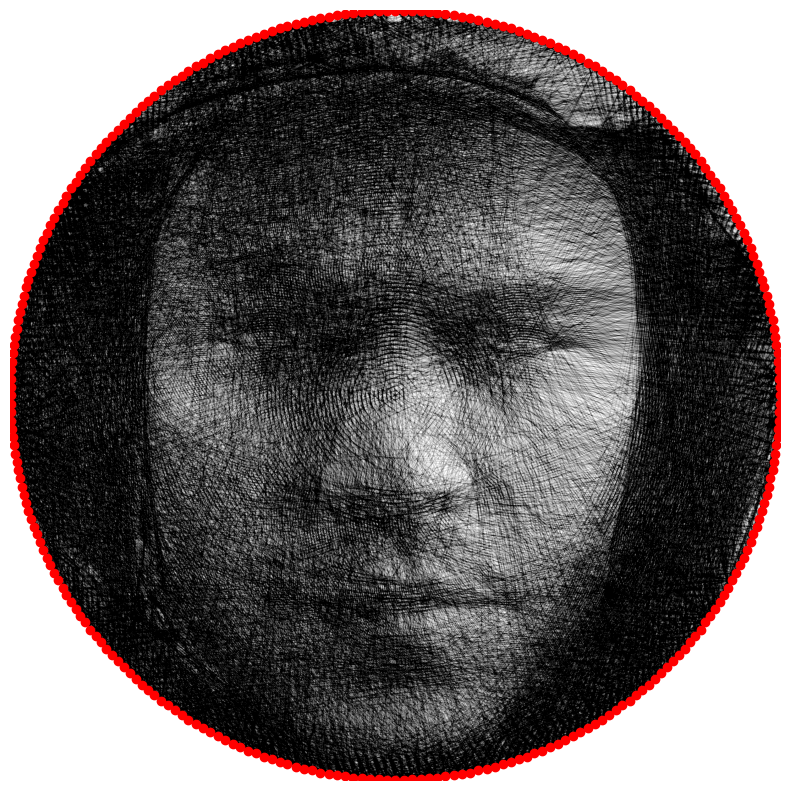

In [88]:
plt.figure(figsize=(10, 10))  
plt.imshow(art.string_art_img.T, cmap='gray_r', vmin=0, vmax=1)
anchors_x, anchors_y = zip(*art.anchors)
plt.scatter(anchors_x, anchors_y, color='red')
plt.axis('off')
plt.show()

In [89]:
save_dir = "../outputs/the_martian"

In [90]:
art.save_data(save_dir)

In [91]:
create_img_from_anchors(save_dir, [10, 20, 30, 40, 50, 60, 70, 80, 90])